#### Linear Regression Boston Housing
Oct 22, 2019

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

%matplotlib inline

#### Load the Boston Data

In [2]:
from sklearn.datasets import load_boston

boston_raw = load_boston()
boston_raw.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(boston_raw.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston = pd.DataFrame(data=boston_raw.data, columns=boston_raw.feature_names)

In [5]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['PRICE'] = boston_raw.target

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Few Observations:
* no missing data
* all data are numeric, no categorical data
* looking at at mean values of each features we can see that they have different scale

#### Get the correlation of each columns/fields

In [10]:
correlation = boston.corr()['PRICE'].drop('PRICE')
print(correlation.sort_values(kind='quicksort', ascending=False))

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64


In [11]:
def get_corrData(corr_threshold):
    
    abs_corr = correlation.abs()
    #high_corr = abs_corr[abs_corr > corr_threshold].index.values.tolist()
    high_corr = abs_corr[abs_corr > corr_threshold]
    
    return high_corr

In [12]:
corrData = get_corrData(0.48)
print(corrData.sort_values(kind='quicksort', ascending=False))

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
Name: PRICE, dtype: float64


In [13]:
corrData.index

Index(['INDUS', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

#### Plotting correlation heatmap

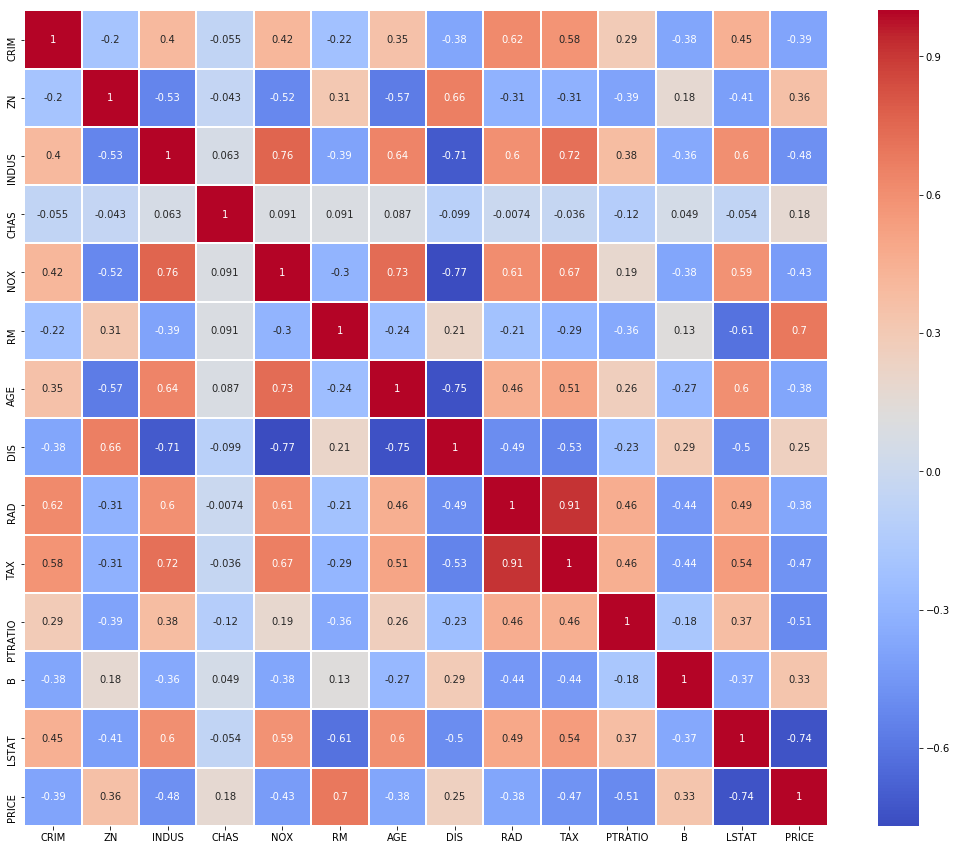

In [14]:
plt.figure(figsize=(18,15))
sns.heatmap(boston.corr(),linewidth=1, annot=True, cmap='coolwarm')

From the correlation result, it shows that RM and LSTAT has a high positive and negative correlation respectively

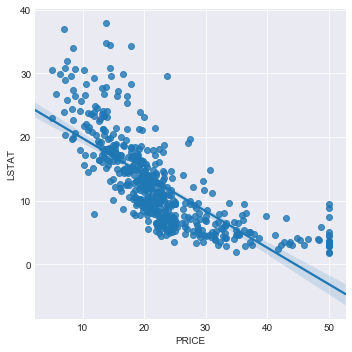

In [15]:
sns.set_style('darkgrid')
sns.lmplot(x='PRICE',y='LSTAT', data=boston,  fit_reg=True)

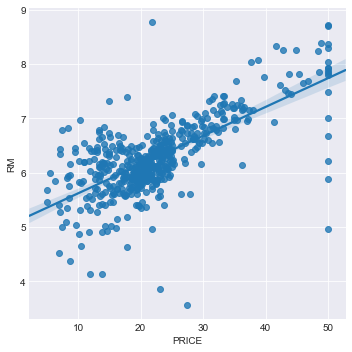

In [16]:
sns.lmplot(x='PRICE',y='RM', data=boston,  fit_reg=True)

### Machine Learning Model Creation

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

##### Split the dataset set to have a training and test data

In [20]:
X = boston.drop('PRICE', axis=1)
y = boston.PRICE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (354, 13)
y_train: (354,)
X_test: (152, 13)
y_test: (152,)


##### Create the Linear Regression Model
Let's include the entire feature first and see the result

In [22]:
dectreeReg = DecisionTreeRegressor()
dectreeReg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

##### Make prediction on the test data

In [23]:
prediction = dectreeReg.predict(X_test)
prediction

array([25. , 32. , 13.3, 24.7, 21.7, 18.5, 22.4, 17.8, 23. , 20.3, 19.5,
       19.5,  5.6, 21.4, 18.7, 25. , 17.3,  7.2, 50. , 16.7, 25. , 22.1,
       13.6, 22.8, 12.7, 15.2, 21.7, 13.4, 19.4, 19.9, 18.8, 23.1, 17.8,
       23.1, 15.2, 15.6, 33.1, 18.7, 22.5, 24.8, 17.5, 32. , 50. , 16.2,
       19.8, 12.7, 13.6, 24.7, 20. , 32. , 22.9, 34.9, 19.4, 28.4, 50. ,
       19.5, 13.8, 27.9, 19.8, 22.5, 24.8, 32.9, 29.4, 18.2, 28. , 14.4,
       15.4, 22.9, 28. , 13.4, 22.9, 28.7,  7.2, 23.5, 21.4,  5.6, 19.8,
       44. , 13.1,  8.1, 22. , 11.9, 18.6,  7.2, 19.3, 29.9, 19. , 23.1,
       22.1, 16.8, 22.7,  5.6, 19.2, 18.6, 24.3, 19.2, 50. , 13.8, 16.7,
       13.1, 17.5, 24.5, 14.6, 20.4, 19.7, 10.2, 20.4, 24.8, 17.5, 21.9,
        7.2, 13.1, 22.2, 29.6, 31.7, 13.5, 43.1, 14.8, 21.2, 23.7, 16.2,
       24.7,  5. , 19.3, 24.7, 23.1, 23.2, 37.2, 18. , 43.8, 15.2, 24.1,
       18.2, 18.4, 11.8, 22.3, 17.5, 30.5, 29.8, 18.4, 22.5, 23.5, 18.7,
       18.3,  5.6, 18.5, 18. ,  8.5, 14.4, 44.8, 19

##### Model evaluation with R2_score

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print("r2_score:",r2_score(y_test, prediction))
print("mean_squared_error:",mean_squared_error(y_test, prediction))
print(np.sqrt(mean_squared_error(y_test, prediction)))

r2_score: 0.8625647799737
mean_squared_error: 10.240723684210527
3.2001130736601366


#### Focus on LSTAT and RM and see if this will increase the score

In [26]:
X = boston[corrData.index]
y = boston.PRICE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
dectreeReg = DecisionTreeRegressor()
dectreeReg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
prediction = dectreeReg.predict(X_test)
prediction

array([16.5, 33.1, 20.5, 22.2, 13.4, 18.5, 19.8, 13.3, 22.2, 20.3, 18.3,
       16.6, 13.8, 21. , 17.1, 25. , 15.2,  7.2, 46. , 14.1, 24.7, 23.3,
       13.2, 23.8, 17.4, 11.7, 50. , 15.4, 18.3, 21.1, 16.6, 23.1, 31. ,
       15. , 11. , 15.6, 31.5, 19. , 18.3, 23. , 14.4, 27.5, 46. , 18.7,
       16.5, 11.7, 19.5, 23.1, 17.4, 29.4, 23.3, 29. , 14.8, 27.5, 43.1,
       18.5, 14.9, 26.6, 20.5, 19.5, 27.5, 34.9, 33.1, 18.4, 28. , 14.4,
       13.4, 22.2, 28. , 23.2, 21.1, 27.5, 13.1, 28.7, 21.7,  7.2, 18.6,
       50. , 13.3, 11.5, 22. ,  5.6, 21. ,  8.1, 21.2, 27.5, 14.9, 23.1,
       24.1, 17.7, 22.6,  8.1, 18.6, 18.5, 50. , 18.6, 25. ,  8.8, 14.5,
       13.3, 17.5, 24.1, 12.3, 20.4, 24.3, 13.1, 18.2, 25. , 23.4, 28.7,
        5.6, 14.1, 22.2, 19.8, 32.2, 13.8, 50. , 19.5, 16.2, 24.6, 17.1,
       25. , 11. , 20.3, 23.5, 23. , 24.6, 37.2, 18.4, 50. , 17.3, 22. ,
       21.7, 19.4, 13.4, 21.7, 23.4, 30.5, 29.8, 16.6, 16.6, 28.7, 22.6,
       14.4,  8.1, 18.5, 17.4, 12.5, 13.6, 44.8, 14

In [29]:
print("r2_score:",r2_score(y_test, prediction))
print("mean_squared_error:",mean_squared_error(y_test, prediction))
print(np.sqrt(mean_squared_error(y_test, prediction)))

r2_score: 0.5862180893484766
mean_squared_error: 30.832171052631576
5.552672424394544
